In [11]:
#implementación recursiva approach top-down: p: precio, n:tamaño de la varilla
import math
def cut_rod(p, n):
  if n == 0:
    return 0, []
  q = -math.inf
  cuts = []
  for i in range(1, n + 1):
    current_value, current_cuts = cut_rod(p, n - i)
    if p[i - 1] + current_value > q:
      q = p[i - 1] + current_value
      cuts = [i] + current_cuts
  return q, cuts

# Ejemplo de uso:
p = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(len(n)):
  beneficio, cortes = cut_rod(p, n[i])
  print("Para", n[i], "el beneficio óptimo es:", beneficio, "con cortes:", cortes)


Para 1 el beneficio óptimo es: 1 con cortes: [1]
Para 2 el beneficio óptimo es: 5 con cortes: [2]
Para 3 el beneficio óptimo es: 8 con cortes: [3]
Para 4 el beneficio óptimo es: 10 con cortes: [2, 2]
Para 5 el beneficio óptimo es: 13 con cortes: [2, 3]
Para 6 el beneficio óptimo es: 17 con cortes: [6]
Para 7 el beneficio óptimo es: 18 con cortes: [1, 6]
Para 8 el beneficio óptimo es: 22 con cortes: [2, 6]
Para 9 el beneficio óptimo es: 25 con cortes: [3, 6]
Para 10 el beneficio óptimo es: 30 con cortes: [10]


In [12]:
#memoizacion
def memo_cut_rod(p, n):
    r = [-1] * (n + 1)
    s = [0] * (n + 1)
    for i in range(n + 1):
        r[i] = -math.inf
    q, cuts = memo_cut_rod_aux(p, n, r, s)
    return q, cuts

def memo_cut_rod_aux(p, n, r, s):
    if n == 0:
        return 0, []
    if r[n] >= 0:
        # Reconstruir la lista de cortes óptimos
        cuts = []
        length = n
        while length > 0:
            cuts.append(s[length])
            length -= s[length]
        return r[n], cuts
    q = -math.inf
    best_cut = 0
    best_cuts = []
    for i in range(1, n + 1):
        current_value, current_cuts = memo_cut_rod_aux(p, n - i, r, s)
        if p[i - 1] + current_value > q:
            q = p[i - 1] + current_value
            best_cut = i
            best_cuts = [i] + current_cuts
    r[n] = q
    s[n] = best_cut
    return q, best_cuts
  
p = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in n_values:
    beneficio, cortes = memo_cut_rod(p, n)
    print(f"Para longitud {n}, el beneficio óptimo es: {beneficio}, con cortes: {cortes}")

Para longitud 1, el beneficio óptimo es: 1, con cortes: [1]
Para longitud 2, el beneficio óptimo es: 5, con cortes: [2]
Para longitud 3, el beneficio óptimo es: 8, con cortes: [3]
Para longitud 4, el beneficio óptimo es: 10, con cortes: [2, 2]
Para longitud 5, el beneficio óptimo es: 13, con cortes: [2, 3]
Para longitud 6, el beneficio óptimo es: 17, con cortes: [6]
Para longitud 7, el beneficio óptimo es: 18, con cortes: [1, 6]
Para longitud 8, el beneficio óptimo es: 22, con cortes: [2, 6]
Para longitud 9, el beneficio óptimo es: 25, con cortes: [3, 6]
Para longitud 10, el beneficio óptimo es: 30, con cortes: [10]


In [13]:
#iterativo approach bottom-up
def bottom_up_cut_rod(p, n):
    r = [0] * (n + 1)
    s = [0] * (n + 1)
    for j in range(1, n + 1):  # varilla actual
        q = -math.inf
        for i in range(1, j + 1):
            if p[i - 1] + r[j - i] > q:
                q = p[i - 1] + r[j - i]
                s[j] = i
        r[j] = q
    # Reconstruir la lista de cortes óptimos
    cuts = []
    length = n
    while length > 0:
        cuts.append(s[length])
        length -= s[length]
    return r[n], cuts

p = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in n_values:
    beneficio, cortes = bottom_up_cut_rod(p, n)
    print(f"Para longitud {n}, el beneficio óptimo es: {beneficio}, con cortes: {cortes}")

Para longitud 1, el beneficio óptimo es: 1, con cortes: [1]
Para longitud 2, el beneficio óptimo es: 5, con cortes: [2]
Para longitud 3, el beneficio óptimo es: 8, con cortes: [3]
Para longitud 4, el beneficio óptimo es: 10, con cortes: [2, 2]
Para longitud 5, el beneficio óptimo es: 13, con cortes: [2, 3]
Para longitud 6, el beneficio óptimo es: 17, con cortes: [6]
Para longitud 7, el beneficio óptimo es: 18, con cortes: [1, 6]
Para longitud 8, el beneficio óptimo es: 22, con cortes: [2, 6]
Para longitud 9, el beneficio óptimo es: 25, con cortes: [3, 6]
Para longitud 10, el beneficio óptimo es: 30, con cortes: [10]


In [15]:
def ext_bottom_up_cut_rod(p, n):
    r = [0] * n
    s = [0] * n  # cortes que se hicieron
    for j in range(1, n + 1):  # varilla actual
        q = -math.inf
        for i in range(1, j + 1):
            if q < p[i - 1] + r[j - i - 1]:
                q = p[i - 1] + r[j - i - 1]
                s[j - 1] = i - 1
        r[j - 1] = q
    return r, s

def get_cortes(s, n):
    cortes = []
    while n > 0:
        corte = s[n - 1] + 1
        cortes.append(corte)
        n = n - corte
    return cortes

p = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in n_values:
    r, s = ext_bottom_up_cut_rod(p, n)
    cortes = get_cortes(s, n)
    print(f"Para longitud {n}, el beneficio óptimo es: {r[n-1]}, con cortes: {cortes}")

Para longitud 1, el beneficio óptimo es: 1, con cortes: [1]
Para longitud 2, el beneficio óptimo es: 5, con cortes: [2]
Para longitud 3, el beneficio óptimo es: 8, con cortes: [3]
Para longitud 4, el beneficio óptimo es: 10, con cortes: [2, 2]
Para longitud 5, el beneficio óptimo es: 13, con cortes: [2, 3]
Para longitud 6, el beneficio óptimo es: 17, con cortes: [6]
Para longitud 7, el beneficio óptimo es: 18, con cortes: [1, 6]
Para longitud 8, el beneficio óptimo es: 22, con cortes: [2, 6]
Para longitud 9, el beneficio óptimo es: 25, con cortes: [3, 6]
Para longitud 10, el beneficio óptimo es: 30, con cortes: [10]


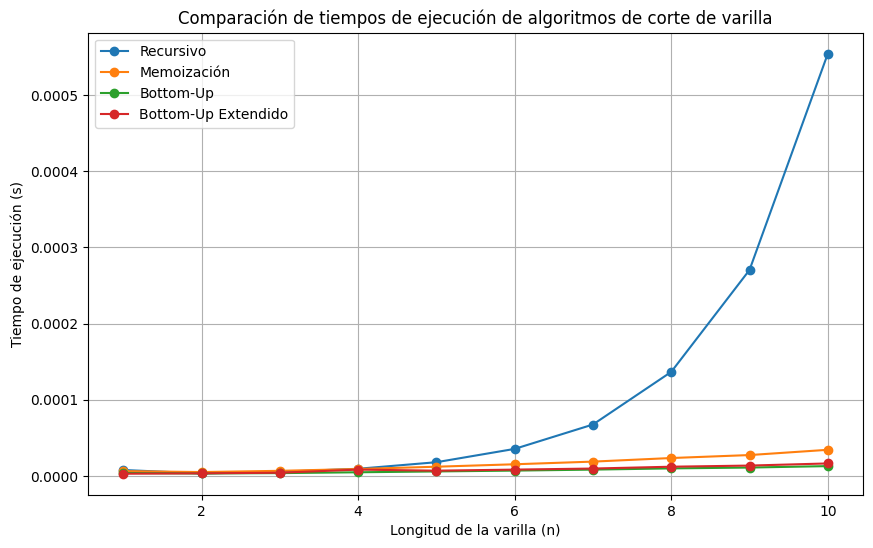

In [16]:
import time
import pandas as pd
import matplotlib.pyplot as plt

def medir_tiempos_algoritmos(p, n_values):
    tiempos = {
        "Recursivo": [],
        "Memoización": [],
        "Bottom-Up": [],
        "Bottom-Up Extendido": []
    }
    for n in n_values:
        # Recursivo
        start = time.perf_counter()
        cut_rod(p, n)
        tiempos["Recursivo"].append(time.perf_counter() - start)
        
        # Memoización
        start = time.perf_counter()
        memo_cut_rod(p, n)
        tiempos["Memoización"].append(time.perf_counter() - start)
        
        # Bottom-Up
        start = time.perf_counter()
        bottom_up_cut_rod(p, n)
        tiempos["Bottom-Up"].append(time.perf_counter() - start)
        
        # Bottom-Up Extendido
        start = time.perf_counter()
        ext_bottom_up_cut_rod(p, n)
        tiempos["Bottom-Up Extendido"].append(time.perf_counter() - start)
    
    return pd.DataFrame(tiempos, index=n_values)

def graficar_tiempos(df):
    plt.figure(figsize=(10,6))
    for col in df.columns:
        plt.plot(df.index, df[col], marker='o', label=col)
    plt.xlabel("Longitud de la varilla (n)")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.title("Comparación de tiempos de ejecución de algoritmos de corte de varilla")
    plt.legend()
    plt.grid()
    plt.show()

# Parámetros de ejemplo
p = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Medir y graficar
df_tiempos = medir_tiempos_algoritmos(p, n_values)
graficar_tiempos(df_tiempos)